In [17]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text
import pandas as pd

In [18]:
# dataset
dataset_name = 'systematic'

# path
figures_path = 'figures/' + dataset_name
acc_rate_csv_path = 'acc_rate/' + dataset_name + '.csv'

# save figure into pdf
df_raw = pd.read_csv(acc_rate_csv_path)

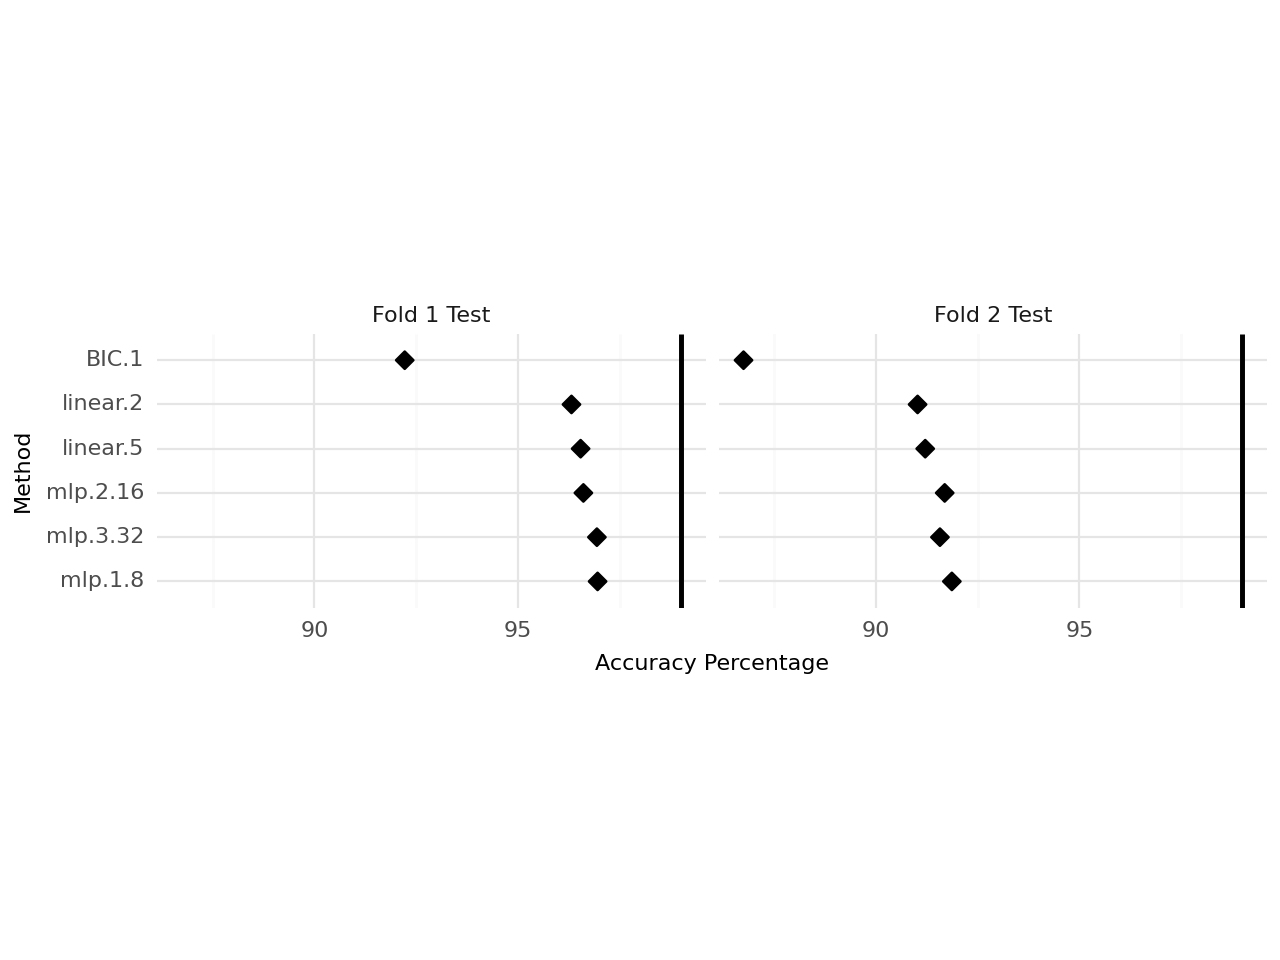

In [19]:
# chosen methods
chosen_methods = ['BIC.1', 'linear.2', 'linear.5', 'mlp.1.8', 'mlp.2.16', 'mlp.3.32']

# df
df = df_raw[df_raw['method'].isin(chosen_methods)]

# Creating data for fold 1
data_fold1 = pd.DataFrame({
    'Method': df['method'],
    'Accuracy': df['fold1.test'],
    'Fold': 'Fold 1 Test'
})

# Creating data for fold 2
data_fold2 = pd.DataFrame({
    'Method': df['method'],
    'Accuracy': df['fold2.test'],
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Order methods by accuracy
method_order = data.groupby('Method')['Accuracy'].mean().sort_values(ascending=False).index

# Convert Method column to categorical with the desired order
data['Method'] = pd.Categorical(data['Method'], categories=method_order, ordered=True)

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method')) +
                geom_point(shape="D", size=2) +
                labs(title="",
                    x="Accuracy Percentage",
                    y="Method") +
                facet_wrap('~Fold', ncol=2) +
                geom_vline(xintercept=99, color="black", size=1) +
                theme_minimal() +
                theme(legend_position='bottom', text=element_text(size=8)) +
                theme(aspect_ratio=0.5)
                )  # Adjust aspect ratio to decrease the distance between methods

print(plot_combined)

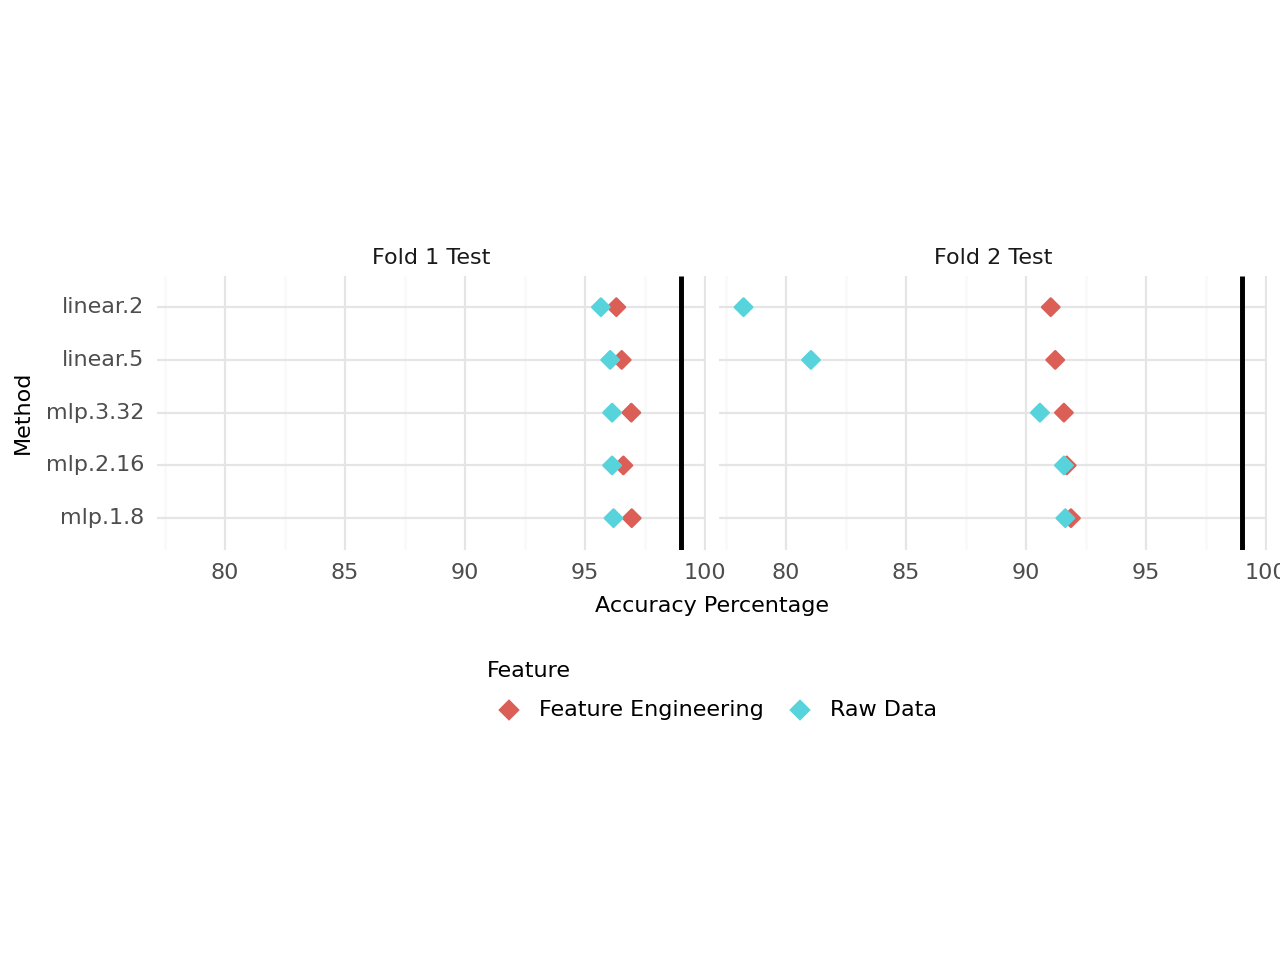

In [20]:
# chosen methods
chosen_methods = ['linear.2', 'linear.5', 'mlp.1.8', 'mlp.2.16', 'mlp.3.32', 'linear.2.nfe', 'linear.5.nfe', 'mlp.1.8.nfe', 'mlp.2.16.nfe', 'mlp.3.32.nfe']

df = df_raw[df_raw['method'].isin(chosen_methods)]

# plot
methods = [met for met in chosen_methods[:int(len(chosen_methods)/2)] for _ in range(2)]
f_e = []
for i in range(5):
    f_e += ['Feature Engineering']
    f_e += ['Raw Data']

acc_1   = df['fold1.test'].to_numpy()
acc_2   = df['fold2.test'].to_numpy()

# Creating data for fold 1
data_fold1 = pd.DataFrame({
    'Method': methods,
    'Feature': f_e,
    'Accuracy': acc_1,
    'Fold': 'Fold 1 Test'
})

# Creating data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Feature': f_e,
    'Accuracy': acc_2,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Order methods by accuracy
method_order = data.groupby('Method')['Accuracy'].mean().sort_values(ascending=False).index

# Convert Method column to categorical with the desired order
data['Method'] = pd.Categorical(data['Method'], categories=method_order, ordered=True)

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Feature')) +
                geom_point(shape="D", size=2) +
                labs(title="",
                    x="Accuracy Percentage",
                    y="Method") +
                facet_wrap('~Fold', ncol=2) +
                geom_vline(xintercept=99, color="black", size=1) +
                theme_minimal() +
                theme(legend_position='bottom', text=element_text(size=8)) +
                theme(aspect_ratio=0.5)
                )  # Adjust aspect ratio to decrease the distance between methods

# Displaying the combined plot
print(plot_combined)